In [1]:
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=5f82e6f02ad8fccc5afeba31abac824b293493cbbf42edf02723525a2de6d1e7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
#very important, has to run
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [3]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [569 kB]
Get:3 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [1301 B]    
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:5 http://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [18.0 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3283 kB]
Hit:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3761 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [3130 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1149 kB]
Get:13 http://archive.ubuntu.

In [4]:
!ls

spark-3.5.0-bin-hadoop3  spark-3.5.0-bin-hadoop3.tgz


In [5]:
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ["SPARK_HOME"] = "/kaggle/working/spark-3.5.0-bin-hadoop3"
!ls

spark-3.5.0-bin-hadoop3  spark-3.5.0-bin-hadoop3.tgz


In [6]:
!rm spark-3.5.0-bin-hadoop3.tgz
!ls

spark-3.5.0-bin-hadoop3


In [7]:
import pyspark

In [77]:
from pyspark.sql.functions import *


In [8]:
import findspark
from pyspark.sql import SparkSession
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) #to format tables better
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/03 22:07:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
bp_tracks = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/bp_track.csv")

In [10]:
bp_tracks.show(10)

+--------+--------------------+-----------------+----------+------------+--------+-----------+--------------------+---+--------+-----------+------------+------+--------+----------+-------------------+---------------+
|track_id|               title|              mix|is_remixed|release_date|genre_id|subgenre_id|           track_url|bpm|duration|duration_ms|        isrc|key_id|label_id|release_id|         updated_on|is_matched_spot|
+--------+--------------------+-----------------+----------+------------+--------+-----------+--------------------+---+--------+-----------+------------+------+--------+----------+-------------------+---------------+
|17775434|      Navigator 3000|     Original Mix|         f|  2023-06-09|      99|        266|beatport.com/trac...|130|    6:48|     408830|DECY62300081|    23|    3222|   4144460|2023-09-14 16:19:56|           NULL|
|17610335|             Nehorah|     Original Mix|         f|  2023-06-05|      99|        265|beatport.com/trac...|124|    6:47|    

In [11]:
sp_tracks = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/sp_track.csv")
milsongs = spark.read.format("csv").option("header", True).load("/kaggle/input/million-song-dataset-spotify-lastfm/Music Info.csv")
UserData = spark.read.format("csv").option("header", True).load("/kaggle/input/million-song-dataset-spotify-lastfm/User Listening History.csv")

In [12]:
milsongs.columns

['track_id',
 'name',
 'artist',
 'spotify_preview_url',
 'spotify_id',
 'tags',
 'genre',
 'year',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [13]:
sp_tracks.columns, bp_tracks.columns , milsongs.columns

(['track_id',
  'track_title',
  'duration_ms',
  'isrc',
  'track_number',
  'release_id',
  'explicit',
  'disc_number',
  'preview_url',
  'updated_on'],
 ['track_id',
  'title',
  'mix',
  'is_remixed',
  'release_date',
  'genre_id',
  'subgenre_id',
  'track_url',
  'bpm',
  'duration',
  'duration_ms',
  'isrc',
  'key_id',
  'label_id',
  'release_id',
  'updated_on',
  'is_matched_spot'],
 ['track_id',
  'name',
  'artist',
  'spotify_preview_url',
  'spotify_id',
  'tags',
  'genre',
  'year',
  'duration_ms',
  'danceability',
  'energy',
  'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'time_signature'])

In [14]:
SPBPjoined = sp_tracks.join(bp_tracks, sp_tracks.isrc == bp_tracks.isrc)

In [15]:
SPBPjoined.columns

['track_id',
 'track_title',
 'duration_ms',
 'isrc',
 'track_number',
 'release_id',
 'explicit',
 'disc_number',
 'preview_url',
 'updated_on',
 'track_id',
 'title',
 'mix',
 'is_remixed',
 'release_date',
 'genre_id',
 'subgenre_id',
 'track_url',
 'bpm',
 'duration',
 'duration_ms',
 'isrc',
 'key_id',
 'label_id',
 'release_id',
 'updated_on',
 'is_matched_spot']

In [16]:
SPBPjoined.take(10)

[Row(track_id='4hMUj6WygOWZg8IProkh1B', track_title='"Reverence 3/4 - Waltz (From ""Les Sylphides""', duration_ms=' Op.70 No.1)"', isrc='34100', track_number='QZ8251730216', release_id='45', explicit='7oSxDgSJa3CX18hbJGqrPf', disc_number='f', preview_url='1', updated_on='https://p.scdn.co/mp3-preview/269cd1a48cac6f60c598711e8eea0abd36289a66?cid=529623fe55c9470c9267eb399357c9d2', track_id='10050196', title='"Reverence 3/4 - Waltz (From ""Les Sylphides""', mix=' Op.70 No.1)"', is_remixed='Original Mix', release_date='f', genre_id='2017-11-21', subgenre_id='5', track_url=None, bpm='beatport.com/track/reverence-34-waltz-from-les-sylphides-op70-no1/10050196', duration='0', duration_ms='0:34', isrc='34100', key_id='QZ8251730216', label_id='33', release_id='66663', updated_on='2174533', is_matched_spot='2023-09-16 03:45:30'),
 Row(track_id='6g6kEGPohR55qvkYd4HsIg', track_title='"Pirouette 1 3/4 - Grand Pas Espagnol (From ""Raymonda""', duration_ms=' Act 2)"', isrc='69130', track_number='QZ825

### tried to match songs from the different data sets using track ids but was no use. nothing matched lol

# Dropping duplicated columns in the dataset

In [17]:
# dropping duplicate and useless columns.
SPBPjoined = SPBPjoined.drop(sp_tracks.track_title)
SPBPjoined = SPBPjoined.drop(sp_tracks.isrc) 
SPBPjoined = SPBPjoined.drop(sp_tracks.preview_url)
# SPBPjoined = SPBPjoined.drop(bp_tracks.preview_url)
SPBPjoined = SPBPjoined.drop(sp_tracks.track_number) 
# SPBPjoined = SPBPjoined.drop(bp_tracks.track_number) 
SPBPjoined = SPBPjoined.drop(sp_tracks.release_id)
SPBPjoined = SPBPjoined.drop(bp_tracks.release_id)
SPBPjoined = SPBPjoined.drop(sp_tracks.updated_on) 
SPBPjoined = SPBPjoined.drop(bp_tracks.updated_on) 
SPBPjoined = SPBPjoined.drop(bp_tracks.track_id) 
SPBPjoined = SPBPjoined.drop(sp_tracks.track_id)
# SPBPjoined = SPBPjoined.drop(sp_tracks.mix) 
SPBPjoined = SPBPjoined.drop(bp_tracks.mix)
SPBPjoined = SPBPjoined.drop(bp_tracks.track_url)
# SPBPjoined = SPBPjoined.drop(sp_tracks.track_url)
# SPBPjoined = SPBPjoined.drop(sp_tracks.duration)
SPBPjoined = SPBPjoined.drop(bp_tracks.duration)
# SPBPjoined = SPBPjoined.drop(sp_tracks.key_id)
SPBPjoined = SPBPjoined.drop(bp_tracks.key_id)
# SPBPjoined = SPBPjoined.drop(sp_tracks.label_id) 
SPBPjoined = SPBPjoined.drop(bp_tracks.label_id)
SPBPjoined = SPBPjoined.drop(sp_tracks.release_id)
SPBPjoined = SPBPjoined.drop(bp_tracks.release_id)
SPBPjoined = SPBPjoined.drop(sp_tracks.updated_on) 
SPBPjoined = SPBPjoined.drop(bp_tracks.updated_on) 

In [18]:
# Drop duplicate rows based on the 'isrc' column
SPBPjoined = SPBPjoined.dropDuplicates(['isrc'])



SPBPjoined

duration_ms,explicit,disc_number,title,is_remixed,release_date,genre_id,subgenre_id,bpm,duration_ms,isrc,is_matched_spot
"Act 2 No.22)""",7oSxDgSJa3CX18hbJ...,f,"""Ronds de Jambe e...",Original Mix,f,2017-11-21,5,beatport.com/trac...,1:56,116571,2023-09-16 03:45:30
"Act 1 No.14)""",7oSxDgSJa3CX18hbJ...,f,"""Coda 1 2/4 (slo...",Original Mix,f,2017-11-21,5,beatport.com/trac...,2:06,126923,2023-09-16 03:45:30
"Act 2)""",7oSxDgSJa3CX18hbJ...,f,"""Plie 2 4/4 - Ada...",Original Mix,f,2017-11-21,5,beatport.com/trac...,2:08,128437,2023-09-16 03:45:30
"gone""""""",3isENePy1TXeOVitF...,f,"""""""Through crumbl...",Original Mix,f,2017-11-20,3,beatport.com/trac...,3:18,198415,2023-09-17 05:43:53
Bill Coleman & 8...,1LTlJqbIp1Mf2NExd...,f,Start It Up,Bill Coleman & 8...,t,2021-04-30,39,beatport.com/trac...,4:10,250934,2023-09-18 18:13:51
"Op.70 No.1)""",7oSxDgSJa3CX18hbJ...,f,"""Reverence 3/4 - ...",Original Mix,f,2017-11-21,5,beatport.com/trac...,0:34,34100,2023-09-16 03:45:30
"Act 2)""",7oSxDgSJa3CX18hbJ...,f,"""Pirouette 1 3/4 ...",Original Mix,f,2017-11-21,5,beatport.com/trac...,1:09,69130,2023-09-16 03:45:30
"Act 3 No.29)""",7oSxDgSJa3CX18hbJ...,f,"""Center Adage 3/4...",Original Mix,f,2017-11-21,5,beatport.com/trac...,1:13,73000,2023-09-16 03:45:30
147000,f,1,Lake Symphony,f,2017-12-08,3,NULL,69,147000,AAA201704185,t
212296,f,1,Pink,f,2018-05-11,6,NULL,84,212296,AAA201804198,t


JOINING AUDIO FEAUTURES

In [19]:
aud_feat = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/audio_features.csv")

In [20]:
SPBPjoined=SPBPjoined.drop("duration_ms")

In [21]:
SPBPjoined.columns

['explicit',
 'disc_number',
 'title',
 'is_remixed',
 'release_date',
 'genre_id',
 'subgenre_id',
 'bpm',
 'isrc',
 'is_matched_spot']

In [22]:
joined_df = SPBPjoined.join(aud_feat, SPBPjoined.isrc == aud_feat.isrc)

In [23]:
joined_df.columns

['explicit',
 'disc_number',
 'title',
 'is_remixed',
 'release_date',
 'genre_id',
 'subgenre_id',
 'bpm',
 'isrc',
 'is_matched_spot',
 'isrc',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'updated_on']

In [24]:
joined_df= joined_df.drop("release_date","updated_on", "key","subgenre_id")

In [25]:
# genre_id, time_signature, is_matched_spot , disc_number,mode

- get genre name
- remove genre id,and remaining genre id file
- is_matched_spot
- remove disc number
- remove mode
- remove time signature


In [26]:
joined_df= joined_df.drop("is_matched_spot","disc_number", " mode","time_signature") 

In [27]:
joined_df.columns

['explicit',
 'title',
 'is_remixed',
 'genre_id',
 'bpm',
 'isrc',
 'isrc',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [28]:
# bp_genre = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/bp_genre.csv")
# joined_df = joined_df.join(bp_genre, joined_df.genre_id== bp_genre.genre_id)

In [29]:
# # Count the number of unique values in the 'genre_name' column
# num_unique_values = joined_df.select('genre_name').distinct().count()

# print(f"Number of unique genres: {num_unique_values}")

In [30]:
# # Get all unique values in the 'genre_name' column
# unique_values = joined_df.select('genre_name').distinct().collect()

# # Print all unique values
# for value in unique_values:
#    print(value[0])

### Current Objectives
- join artist with data to validate data (FOR THE LOVE OF GOD)
- check for nulls and incompelete data
- RUN MODEL PLEASE

In [31]:
# we should have song names and artist data in a dataset/ table
#                 
#                        sp_artist_track
#                              ^      ^
#                             ||     ||
#                      sp_artist sp_track

#read artist and artist_track tables
sp_artist = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/sp_artist.csv")
sp_artist_track = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/sp_artist_track.csv")

In [32]:
# creating a view so joins are easier
artists = sp_artist.select("artist_id", "artist_name")
artist_track = sp_artist_track.select("track_id", "artist_id")

In [33]:
artists.columns, artist_track.columns

(['artist_id', 'artist_name'], ['track_id', 'artist_id'])

In [34]:
# 1 put names in tracks, 2 add final result to total tracks

artist_track = artist_track.join(artists, artists.artist_id == artist_track.artist_id).select("artist_name", "track_id")

In [35]:
artist_track.columns

['artist_name', 'track_id']

In [36]:
artistTracks = artist_track.join(sp_tracks, artist_track.track_id == sp_tracks.track_id).select("artist_name", "track_title", "isrc")
artistTracks.columns

['artist_name', 'track_title', 'isrc']

In [37]:
artistTracks.select("track_title", "artist_name").filter(artistTracks.track_title == "I'm Still Standing")

track_title,artist_name
I'm Still Standing,Enawadan
I'm Still Standing,Nayer
I'm Still Standing,Pashaa
I'm Still Standing,Anything But Monday
I'm Still Standing,Enawadan
I'm Still Standing,Ryunosuke Kudo
I'm Still Standing,Stee Downes
I'm Still Standing,Thomaz Krauze
I'm Still Standing,The Moleskins


In [38]:
# for beatport

bp_artist = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/bp_artist.csv")
bp_artist_track = spark.read.format("csv").option("header", True).load("/kaggle/input/10-m-beatport-tracks-spotify-audio-features/bp_artist_track.csv")

In [39]:
bpartists = bp_artist.select("artist_id", "artist_name")
bpartist_track = bp_artist_track.select("track_id", "artist_id")

In [40]:
bpartists.columns, bpartist_track.columns

(['artist_id', 'artist_name'], ['track_id', 'artist_id'])

In [41]:
bpartist_track = bpartist_track.join(bpartists, bpartists.artist_id == bpartist_track.artist_id).select("artist_name", "track_id")

In [42]:
bp_tracks.columns

['track_id',
 'title',
 'mix',
 'is_remixed',
 'release_date',
 'genre_id',
 'subgenre_id',
 'track_url',
 'bpm',
 'duration',
 'duration_ms',
 'isrc',
 'key_id',
 'label_id',
 'release_id',
 'updated_on',
 'is_matched_spot']

In [43]:
bpartistTracks = bpartist_track.join(bp_tracks, bpartist_track.track_id == bp_tracks.track_id).select("artist_name", "title", "isrc")
bpartistTracks.columns

['artist_name', 'title', 'isrc']

In [44]:
bpartistTracks.select("title", "artist_name").filter( bpartistTracks.artist_name == "Elton John")

title,artist_name
All in the Name,Elton John
All in the Name (...,Elton John
All in the Name (...,Elton John
All in the Name (...,Elton John
Symmetry of Two H...,Elton John
Running Back to Y...,Elton John
Running Back to Y...,Elton John
Cold Heart,Elton John
Cold Heart,Elton John
Hold Me Closer,Elton John


In [45]:
artistTracks.select("track_title", "artist_name").filter(artistTracks.artist_name == "Coldplay").show()

+--------------------+-----------+
|         track_title|artist_name|
+--------------------+-----------+
|Something Just Li...|   Coldplay|
|        Higher Power|   Coldplay|
|Something Just Li...|   Coldplay|
|Something Just Li...|   Coldplay|
|Something Just Li...|   Coldplay|
| A Sky Full of Stars|   Coldplay|
|A Sky Full of Sta...|   Coldplay|
|Something Just Li...|   Coldplay|
|Every Teardrop Is...|   Coldplay|
|Something Just Li...|   Coldplay|
|Viva La Vida (fea...|   Coldplay|
|Something Just Li...|   Coldplay|
+--------------------+-----------+



In [46]:
bpartistTracks.select("title", "artist_name").filter(bpartistTracks.artist_name == "Coldplay")

title,artist_name
Paradise,Coldplay
Paradise,Coldplay
Every Teardrop Is...,Coldplay
Midnight,Coldplay
Midnight,Coldplay
Adventure of a Li...,Coldplay
Something Just Li...,Coldplay
Something Just Li...,Coldplay
Something Just Li...,Coldplay
Something Just Li...,Coldplay


In [47]:
joined_df.columns

['explicit',
 'title',
 'is_remixed',
 'genre_id',
 'bpm',
 'isrc',
 'isrc',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [48]:
joined_df = joined_df.drop(bp_tracks.isrc)

In [49]:
# cols = joined_df.columns
# for i in cols:
#     joined_df.filter(joined_df[i].isNull()).show()

In [50]:
joined_df.count()

24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:18 WARN RowBasedKeyValueBatch: Calling spill() on

4666818

In [51]:
sp_tracks.drop_duplicates().count()

24/01/03 22:13:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:13:38 WARN RowBasedKeyValueBatch: Calling spill() on

5777707

In [52]:
bp_tracks.drop_duplicates().count()

24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:15 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/01/03 22:14:20 WARN RowBasedKeyValueBatch: Calling spill() on

10686531

In [58]:
joined_df.select("*").filter("isrc == 'AEA0Q2004050'")

explicit,title,is_remixed,genre_id,bpm,isrc,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
f,Goodbye 2009,f,39,137,AEA0Q2004050,0.0159,0.752,212034,0.977,0.804,0.0576,-12.565,0,0.0688,137,0.445


In [60]:
bpartistTracks.select("*").filter("isrc == 'AEA0Q2004050'")

artist_name,title,isrc
Djjaner,Goodbye 2009,AEA0Q2004050


In [59]:
joined_df.select("*").filter("isrc == 'AEA0Q2004052'")

explicit,title,is_remixed,genre_id,bpm,isrc,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
f,Friday (2009),f,39,137,AEA0Q2004052,0.0937,0.728,212034,0.961,0.875,0.074,-12.678,0,0.443,137,0.286


In [61]:
bpartistTracks.select("*").filter("isrc == 'AEA0Q2004052'")

artist_name,title,isrc
Djjaner,Friday (2009),AEA0Q2004052


In [62]:
bpartistTracks.select("*").filter("isrc == 'DEBL61315990'")

artist_name,title,isrc
DJ Space Raven,Decade,DEBL61315990
Jake Nicholls,Decade,DEBL61315990
S.H.O.K.K.,Decade,DEBL61315990


In [63]:
bpartistTracks.select("*").filter("isrc == 'DEBL60843423'")

artist_name,title,isrc
DJ Space Raven,Decade,DEBL60843423
S.H.O.K.K.,Decade,DEBL60843423
Jake Nicholls,Decade,DEBL60843423


In [64]:
joined_df.columns

['explicit',
 'title',
 'is_remixed',
 'genre_id',
 'bpm',
 'isrc',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [66]:
joined_df.printSchema()

root
 |-- explicit: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_remixed: string (nullable = true)
 |-- genre_id: string (nullable = true)
 |-- bpm: string (nullable = true)
 |-- isrc: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)



In [68]:
joined_df.show(1)

+--------+-----+----------+--------+---+------------+------------+------------+-----------+------+----------------+--------+--------+----+-----------+-----+-------+
|explicit|title|is_remixed|genre_id|bpm|        isrc|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|mode|speechiness|tempo|valence|
+--------+-----+----------+--------+---+------------+------------+------------+-----------+------+----------------+--------+--------+----+-----------+-----+-------+
|       f| Pink|         f|       6| 84|AAA201804198|      0.0173|       0.519|     212296| 0.671|        1.64e-05|    0.36|  -7.844|   1|      0.459|  127|  0.337|
+--------+-----+----------+--------+---+------------+------------+------------+-----------+------+----------------+--------+--------+----+-----------+-----+-------+
only showing top 1 row



In [69]:
joined_df

explicit,title,is_remixed,genre_id,bpm,isrc,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
f,Pink,f,6,84,AAA201804198,0.0173,0.519,212296,0.671,1.64e-05,0.36,-7.844,1,0.459,127,0.337
f,Aelien,f,38,135,AE2641600007,0.0087,0.523,156889,0.493,0.789,0.146,-6.805,1,0.0296,135,0.118
f,Pilunja feat. Naj...,f,9,120,AE2641600009,0.0305,0.385,224700,0.348,0.838,0.213,-13.338,0,0.156,217,0.347
f,21st Century,f,3,120,AEA0D1804264,0.61,0.53,279060,0.599,0.96,0.0736,-9.039,0,0.0379,120,0.145
f,All at First,f,3,90,AEA0D1804266,0.37,0.596,291320,0.384,0.333,0.14,-16.141,1,0.035,120,0.13
f,Life (Lounge Vers...,f,3,120,AEA0D1804271,0.63,0.593,246740,0.432,0.0227,0.238,-12.591,0,0.044,120,0.395
f,Round,f,3,68,AEA0D1808937,0.166,0.458,259556,0.962,0.789,0.106,-5.807,1,0.112,203,0.173
t,Плюнь на следы,f,39,140,AEA0D1819367,4.82e-06,0.391,266919,0.97,0.000135,0.265,-7.415,1,0.115,140,0.5
t,Хорошо быть моделью,f,3,140,AEA0D1823757,0.108,0.614,227096,0.692,0.918,0.101,-13.391,1,0.081,140,0.419
f,Traffic King,f,3,120,AEA0D1852478,0.133,0.729,231941,0.853,0.921,0.133,-5.054,1,0.165,120,0.0967


In [70]:
joined_df = joined_df.drop("genre_id", "mode")

In [72]:
numerical_cols = ["bpm", "acousticness", "danceability",
                  "duration_ms", "energy", "instrumentalness",
                  "liveness", "loudness", "speechiness", "tempo",
                  "valence"]

In [80]:
from pyspark.sql.types import *

In [81]:
for column in numerical_cols:
    joined_df = joined_df.withColumn(column, col(column).cast(FloatType()))

In [82]:
joined_df.printSchema()

root
 |-- explicit: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_remixed: string (nullable = true)
 |-- bpm: float (nullable = true)
 |-- isrc: string (nullable = true)
 |-- acousticness: float (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- valence: float (nullable = true)



In [89]:
from sklearn import preprocessing

In [86]:
categorical_columns = ['explicit', 'is_remixed']

In [92]:
for column in categorical_columns:
    joined_df = joined_df.withColumn(column, when(col(column) == 't', 1).otherwise(0).cast("int"))

In [93]:
joined_df.printSchema()

root
 |-- explicit: integer (nullable = false)
 |-- title: string (nullable = true)
 |-- is_remixed: integer (nullable = false)
 |-- bpm: float (nullable = true)
 |-- isrc: string (nullable = true)
 |-- acousticness: float (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- valence: float (nullable = true)



In [94]:
numerical_cols = numerical_cols + categorical_columns
numerical_cols

['bpm',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'explicit',
 'is_remixed']

In [95]:
final_df = joined_df.drop('title')

In [101]:
final_df = final_df.drop("isrc")

In [98]:
final_df.printSchema()

root
 |-- explicit: integer (nullable = false)
 |-- is_remixed: integer (nullable = false)
 |-- bpm: float (nullable = true)
 |-- isrc: string (nullable = true)
 |-- acousticness: float (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- valence: float (nullable = true)



# Model

In [102]:
# kmeans
features = numerical_cols[:]
from pyspark.ml.feature import VectorAssembler 

vec_assembler = VectorAssembler(inputCols = features, outputCol='features') 

final_data = vec_assembler.transform(final_df) 
final_data.select('features').show(5)


+--------------------+
|            features|
+--------------------+
|[69.0,0.879999995...|
|[84.0,0.017300000...|
|[127.0,0.00457999...|
|[135.0,0.00870000...|
|[120.0,0.03050000...|
+--------------------+
only showing top 5 rows



In [114]:
from pyspark.ml.feature import StandardScaler 
  
scaler = StandardScaler(inputCol="features",  
                        outputCol="scaledFeatures",  
                        withStd=True,  
                        withMean=False) 
  
# Compute summary statistics by fitting the StandardScaler 
scalerModel = scaler.fit(final_data) 
  
# Normalize each feature to have unit standard deviation. 
final_data = scalerModel.transform(final_data) 
  
final_data.select('scaledFeatures').show(5)

+--------------------+
|      scaledFeatures|
+--------------------+
|[3.22706995959033...|
|[3.92860690732735...|
|[5.93967949084017...|
|[6.31383252963325...|
|[5.61229558189622...|
+--------------------+
only showing top 5 rows



In [115]:
#Importing the model 
from pyspark.ml.clustering import KMeans 
from pyspark.ml.evaluation import ClusteringEvaluator 

silhouette_score=[] 

evaluator = ClusteringEvaluator(predictionCol='prediction', 
                                featuresCol='features',  
                                    metricName='silhouette', 
                                    distanceMeasure='squaredEuclidean') 

# for i in range(2,10): 
#     kmeans=KMeans(featuresCol='features', k=i) 
#     model=kmeans.fit(final_data) 
#     predictions=model.transform(final_data) 
#     score=evaluator.evaluate(predictions) 
#     silhouette_score.append(score) 
#     print('Silhouette Score for k =',i,'is',score)
kmeans=KMeans(featuresCol='features', k=3) #after running the code above, this is the best value 
model=kmeans.fit(final_data) 
predictions=model.transform(final_data) 
score=evaluator.evaluate(predictions)

24/01/04 02:15:03 WARN MemoryStore: Not enough space to cache rdd_3073_1 in memory! (computed 61.6 MiB so far)
24/01/04 02:15:03 WARN BlockManager: Persisting block rdd_3073_1 to disk instead.
24/01/04 02:15:03 WARN MemoryStore: Not enough space to cache rdd_3073_2 in memory! (computed 61.6 MiB so far)
24/01/04 02:15:03 WARN BlockManager: Persisting block rdd_3073_2 to disk instead.
24/01/04 02:15:04 WARN MemoryStore: Not enough space to cache rdd_3073_0 in memory! (computed 61.6 MiB so far)
24/01/04 02:15:04 WARN BlockManager: Persisting block rdd_3073_0 to disk instead.
24/01/04 02:15:24 WARN MemoryStore: Not enough space to cache rdd_3073_4 in memory! (computed 27.1 MiB so far)
24/01/04 02:15:24 WARN BlockManager: Persisting block rdd_3073_4 to disk instead.
24/01/04 02:15:25 WARN MemoryStore: Not enough space to cache rdd_3073_6 in memory! (computed 27.1 MiB so far)
24/01/04 02:15:25 WARN BlockManager: Persisting block rdd_3073_6 to disk instead.
24/01/04 02:15:28 WARN MemoryStore:

In [116]:
score

0.7256280120844165

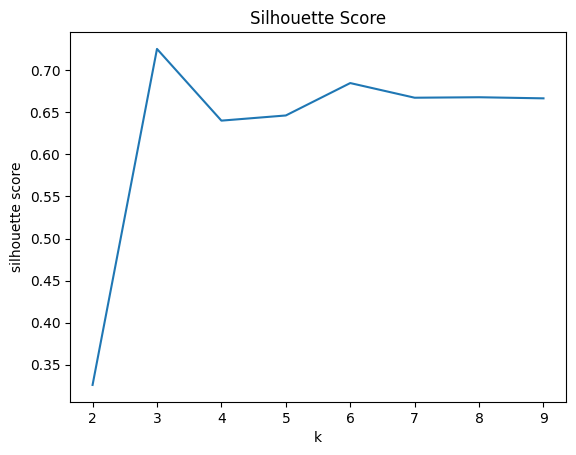

In [106]:
import matplotlib.pyplot as plt 
  
plt.plot(range(2,10),silhouette_score) 
plt.xlabel('k') 
plt.ylabel('silhouette score') 
plt.title('Silhouette Score') 
plt.show()

In [117]:
plt.savefig("silhouette Score.png")

<Figure size 640x480 with 0 Axes>

In [118]:
# Trains a k-means model. 
kmeans = KMeans(featuresCol='features',k=3) 
model = kmeans.fit(final_data) 
predictions = model.transform(final_data)


24/01/04 02:22:32 WARN MemoryStore: Not enough space to cache rdd_3273_0 in memory! (computed 61.6 MiB so far)
24/01/04 02:22:32 WARN BlockManager: Persisting block rdd_3273_0 to disk instead.
24/01/04 02:22:33 WARN MemoryStore: Not enough space to cache rdd_3273_3 in memory! (computed 61.6 MiB so far)
24/01/04 02:22:33 WARN BlockManager: Persisting block rdd_3273_3 to disk instead.
24/01/04 02:22:33 WARN MemoryStore: Not enough space to cache rdd_3273_2 in memory! (computed 61.6 MiB so far)
24/01/04 02:22:33 WARN BlockManager: Persisting block rdd_3273_2 to disk instead.
24/01/04 02:22:33 WARN MemoryStore: Not enough space to cache rdd_3273_1 in memory! (computed 61.6 MiB so far)
24/01/04 02:22:33 WARN BlockManager: Persisting block rdd_3273_1 to disk instead.
24/01/04 02:22:37 WARN MemoryStore: Not enough space to cache rdd_3273_2 in memory! (computed 61.6 MiB so far)
24/01/04 02:22:54 WARN MemoryStore: Not enough space to cache rdd_3273_5 in memory! (computed 27.1 MiB so far)
24/01/

In [120]:
# Printing cluster centers 
centers = model.clusterCenters() 
print("Cluster Centers: ") 
for center in centers: 
	print(center)


Cluster Centers: 
[ 1.22685530e+02  6.24426117e-02  7.07913507e-01  4.19622360e+05
  7.39034238e-01  7.45325407e-01  1.63487964e-01 -9.38272839e+00
  7.45343009e-02  1.27752026e+02  3.74512248e-01  9.71986997e-03
  2.10803457e-01]
[ 1.15568326e+02  1.70813988e-01  6.38451925e-01  2.30128294e+05
  6.86217044e-01  4.98708313e-01  1.88012472e-01 -9.00763424e+00
  1.03790482e-01  1.25680400e+02  4.22210277e-01  7.57081665e-02
  8.55859463e-02]
[ 1.20279322e+02  4.25314776e-02  6.03223070e-01  3.93522073e+06
  7.66662484e-01  6.32750553e-01  2.00284004e-01 -9.07823484e+00
  6.40885168e-02  1.28407992e+02  2.61965544e-01  2.48286564e-02
  4.46139920e-02]


In [110]:
len(centers[0])

13

In [111]:
len(final_df.columns)

13

In [121]:
predictions.select('prediction').show(5)

+----------+
|prediction|
+----------+
|         1|
|         1|
|         0|
|         1|
|         1|
+----------+
only showing top 5 rows



im so tired fa i will start getting ready b2a this is as far as i was able to get 

 its now 4:42am kefayaaaaaaaaa
 
 
recommended things to add: 
- a graph to show the clustered songs
- finalize the model of course
- take a break


have fun